<a href="https://colab.research.google.com/github/AYUSH-DEV21/EDA-THEORY-DA/blob/main/EDA_THEORY_DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# 21BDS0031
# AYUSH GIRI
# Module 1: Introduction to Exploratory Data Analysis (EDA)

# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('penguins_size.csv')  # Make sure the file name matches

# Initial Data Overview
print("Dimensions of the dataset:", df.shape)
print(df.info())
print(df.describe())
print("Missing values:\n", df.isnull().sum())

Dimensions of the dataset: (344, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             343 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  341 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         341.000000   342.000000
mean          43.921930        17.151170         200.873900  4201.754386
std            5.459584         1.974793          14.061585   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%  

In [13]:
# Module 2: Data Transformation

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer

# Handle missing data using Median Imputation for numerical columns
imputer = SimpleImputer(strategy='median')
df[df.select_dtypes(include=['number']).columns] = imputer.fit_transform(df.select_dtypes(include=['number']))
print("Missing values after filling:\n", df.isnull().sum())

# Data Deduplication
df = df.drop_duplicates()
print("Dimensions after deduplication:", df.shape)

# Binning (Discretization) for 'culmen_length_mm' into 3 bins
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
df['culmen_length_binned'] = binner.fit_transform(df[['culmen_length_mm']])

Missing values after filling:
 species               0
island                1
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
body_mass_g           0
sex                  10
dtype: int64
Dimensions after deduplication: (344, 7)


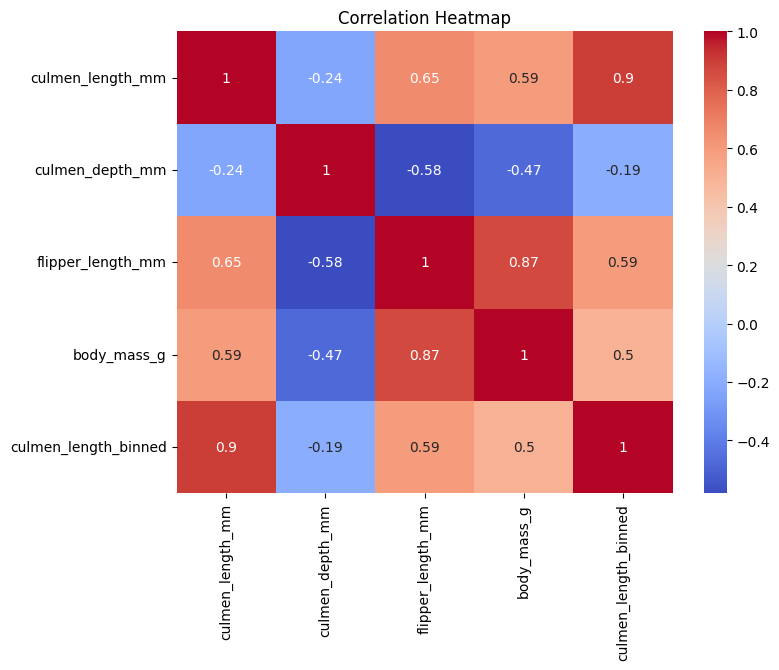

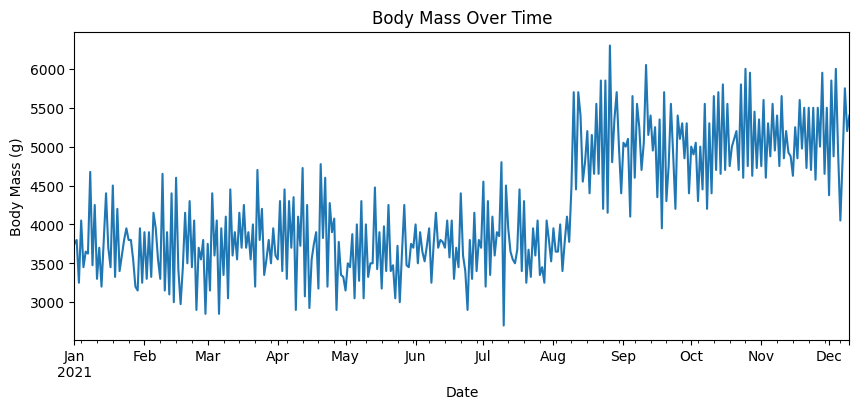

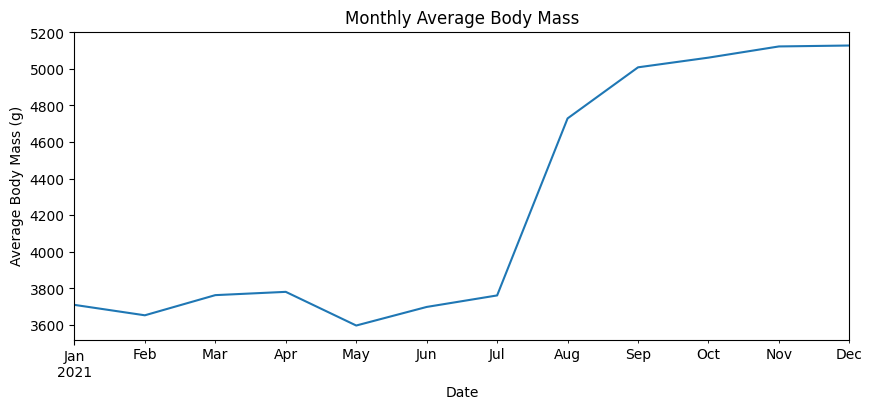

In [14]:
# Module 3: Correlation Analysis and Time Series Analysis

import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Analysis
corr = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Time Series Analysis (if applicable)
# Assuming we have or can create a time-based index for demonstration purposes

# Creating a dummy 'Date' column if not present
if 'Date' not in df.columns:
    # Generate a date range with the same length as the dataset
    df['Date'] = pd.date_range(start='2021-01-01', periods=len(df), freq='D')

# Setting 'Date' as index for time series plotting
df.set_index('Date', inplace=True)

# Plotting a time series for 'body_mass_g' over time
plt.figure(figsize=(10, 4))
df['body_mass_g'].plot()
plt.title('Body Mass Over Time')
plt.xlabel('Date')
plt.ylabel('Body Mass (g)')
plt.show()

# Resample data to observe monthly trends if needed
df_monthly = df['body_mass_g'].resample('ME').mean()
plt.figure(figsize=(10, 4))
df_monthly.plot()
plt.title('Monthly Average Body Mass')
plt.xlabel('Date')
plt.ylabel('Average Body Mass (g)')
plt.show()

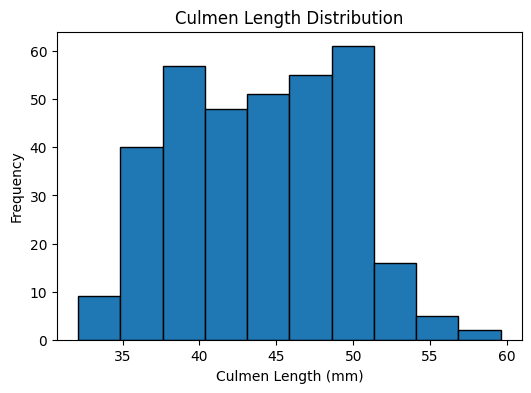

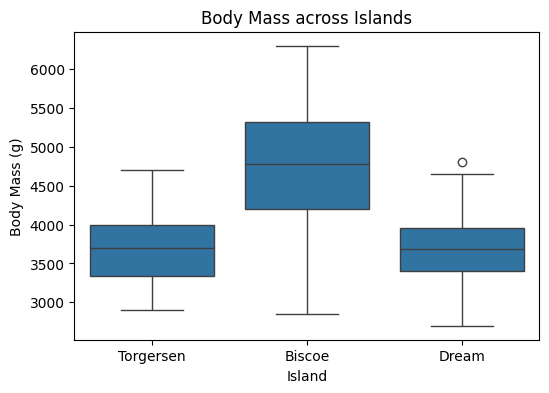

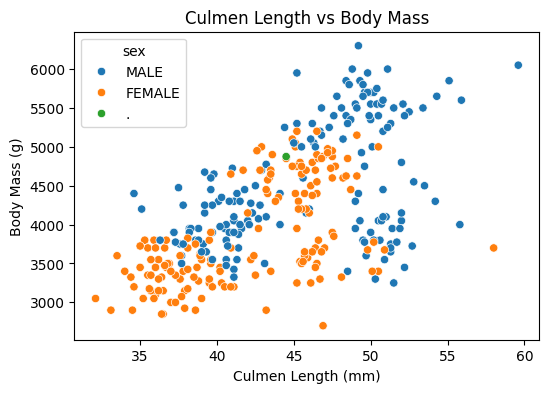

In [15]:
# Module 4: Data Summarization and Visualization

# Histogram for Culmen Length Distribution
plt.figure(figsize=(6, 4))
plt.hist(df['culmen_length_mm'], bins=10, edgecolor='black')
plt.title('Culmen Length Distribution')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Body Mass across Islands
plt.figure(figsize=(6, 4))
sns.boxplot(x='island', y='body_mass_g', data=df)
plt.title('Body Mass across Islands')
plt.xlabel('Island')
plt.ylabel('Body Mass (g)')
plt.show()

# Scatter Plot: Culmen Length vs Body Mass with Hue as Sex
plt.figure(figsize=(6, 4))
sns.scatterplot(x='culmen_length_mm', y='body_mass_g', hue='sex', data=df)
plt.title('Culmen Length vs Body Mass')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

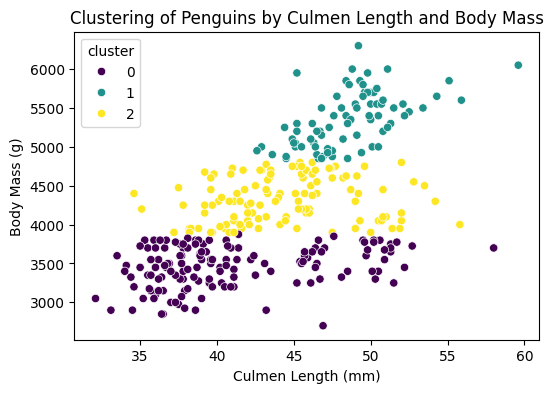

In [16]:
# Module 5: Clustering Algorithms and Outlier Detection

from sklearn.cluster import KMeans

# Clustering - KMeans for Outlier Detection
# Using two main numerical features: culmen_length_mm and body_mass_g for clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['culmen_length_mm', 'body_mass_g']])

plt.figure(figsize=(6, 4))
sns.scatterplot(x='culmen_length_mm', y='body_mass_g', hue='cluster', data=df, palette='viridis')
plt.title('Clustering of Penguins by Culmen Length and Body Mass')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

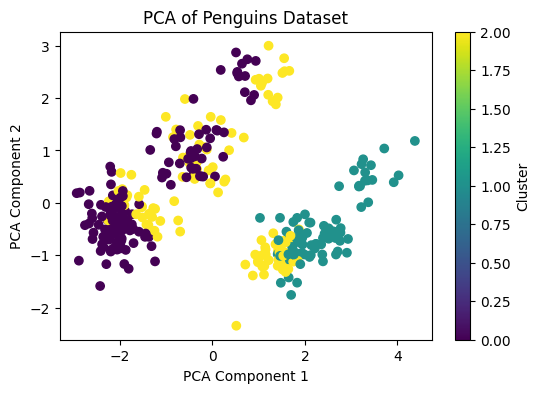

In [17]:
# Module 6: Dimensionality Reduction

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Dimensionality Reduction - PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=['number']).drop(columns=['cluster']))
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(6, 4))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['cluster'], cmap='viridis')
plt.title('PCA of Penguins Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

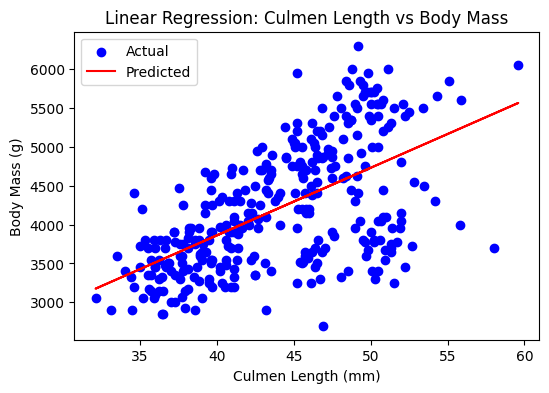

Mean Squared Error of the Linear Regression Model: 422987.18056569324


In [18]:
# Module 7: Model Development and Evaluation

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Simple Linear Regression Model for predicting body_mass_g from culmen_length_mm
# Dropping missing rows in categorical columns for model consistency
df.dropna(inplace=True)
X = df[['culmen_length_mm']].values
y = df['body_mass_g'].values

regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

# Plotting the Linear Regression Line
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.title('Linear Regression: Culmen Length vs Body Mass')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Body Mass (g)')
plt.legend()
plt.show()

# Evaluation of the Model
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error of the Linear Regression Model:", mse)